In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stats as st

np.set_printoptions(suppress=True)


In [2]:
df=pd.read_csv("./Data/Housing.csv")
df.to_numpy()
missing_values_count = df.isnull().sum() # Checked missing values
print("The missing values per column:")
print(missing_values_count) 

num_duplicates = df.duplicated().sum() # Checked all rows for duplicate values
print("The number of duplicate values in this dataset is:", num_duplicates)

The missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
The number of duplicate values in this dataset is: 0


In [3]:
#data anaylsis of the the price column
price_array=np.array(df["price"])
print("Price")
np.set_printoptions(legacy='1.25')
print(f"Mean: ",np.mean(price_array))
print(f"Median: ",np.median(price_array))
try:
    print(f"Mode: ",st.mode(price_array))
except:
    print("no valid mode")
print(f"Standard Deviation: ",np.std(price_array))
print(f"Range: ",np.ptp(price_array))

Price
Mean:  4766729.247706422
Median:  4340000.0
no valid mode
Standard Deviation:  1868722.8281312082
Range:  11550000


In [4]:
#data anaylsis of the the price column
Area_array=np.array(df["area"])
print("Area")
print(f"Mean: ",np.mean(Area_array))
print(f"Median: ",np.median(Area_array))
try:
    print(f"Mode: ",st.mode(Area_array))
except:
    print("no valid mode")
print(f"Standard Diviation: ",np.std(Area_array))
print(f"Range: ",np.ptp(Area_array))

Area
Mean:  5150.54128440367
Median:  4600.0
Mode:  6000
Standard Diviation:  2168.149153321305
Range:  14550


In [5]:
#4.1 Summary Stats

# Find average stories
mean_stories = df['stories'].mean()
print(f"Mean Stories: {mean_stories.round(2)}")

# Find average area per stories
avg_area_per_stories = df.groupby('stories')['area'].mean().round(2)

# Clean up extra info from print()
avg_area_per_stories.index.name = None
avg_area_per_stories.name = None

print("Mean Stories Per Area:")
print(avg_area_per_stories.to_string()) # .to_string() removes the dtype: message at the end

Mean Stories: 1.81
Mean Stories Per Area:
1    5289.82
2    4756.95
3    5316.64
4    6506.17


In [6]:
#4.2 Correlation
# Closer to 1, postive. Closer to -1, negative. 
# Around 0, no relationship.

area_to_stories_correlation = df[['area','stories']].corr()

print(area_to_stories_correlation)

             area   stories
area     1.000000  0.083996
stories  0.083996  1.000000


In [7]:
#5 Filter and Extract

filtered_df = df[df["furnishingstatus"]=="furnished"] # Remove all unfurnished and semi-furnished

print(filtered_df.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
8   9870000  8100         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
8              no             yes        2      yes        furnished  


In [8]:
five_highest_values = price_array[np.argsort(price_array)[-5:]]
print(f"The five highest values: {five_highest_values}")

The five highest values: [11410000 12215000 12250000 12250000 13300000]


In [9]:
# Calculating the number of total bedrooms in each house / Feature Engineering  

# Selecting a column and everything within it
beds = df['bedrooms'].to_numpy()

# Basic filtering with booleans, and adds 1 to beds where guestroom == "yes"
beds += (df["guestroom"].to_numpy() == "yes").astype(int)

# Number of bathrooms
baths = df["bathrooms"].to_numpy()

display(beds, 10) # Print the first ten beds
display(baths, 10)

array([4, 4, 3, 4, 5, 3, 4, 5, 5, 4, 3, 5, 4, 4, 3, 4, 5, 3, 4, 3, 3, 4,
       4, 4, 3, 5, 4, 3, 5, 4, 3, 3, 4, 4, 6, 3, 3, 4, 4, 4, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 4, 3, 3, 5, 3, 4, 3, 4, 5, 5, 4, 4, 2, 4, 4, 3, 3,
       2, 3, 3, 4, 3, 4, 3, 2, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 5, 3, 3, 4, 3, 4, 3, 3, 4, 3, 5, 3, 3, 4, 4, 4, 3, 4, 3, 4, 5,
       4, 3, 6, 3, 3, 4, 4, 5, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 5,
       3, 3, 3, 3, 4, 4, 3, 4, 3, 5, 4, 5, 5, 3, 2, 3, 3, 4, 4, 4, 6, 3,
       3, 3, 4, 5, 3, 4, 5, 4, 5, 4, 4, 4, 3, 2, 4, 4, 3, 3, 4, 4, 4, 5,
       3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 2, 3, 2, 3, 4, 4, 4, 3, 4, 4, 4, 3,
       3, 3, 3, 4, 2, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 2, 3,
       4, 4, 2, 3, 2, 2, 3, 2, 3, 5, 2, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3,
       3, 3, 4, 3, 3, 4, 3, 5, 3, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 4, 3, 3, 5, 4, 4, 4, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 4,
       3, 3, 3, 3, 4, 3, 4, 2, 4, 3, 3, 3, 3, 3, 3,

10

array([2, 4, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,

10

Average Price Per Stories:
1    4170658.59
2    4764073.53
3    5685435.90
4    7208449.76


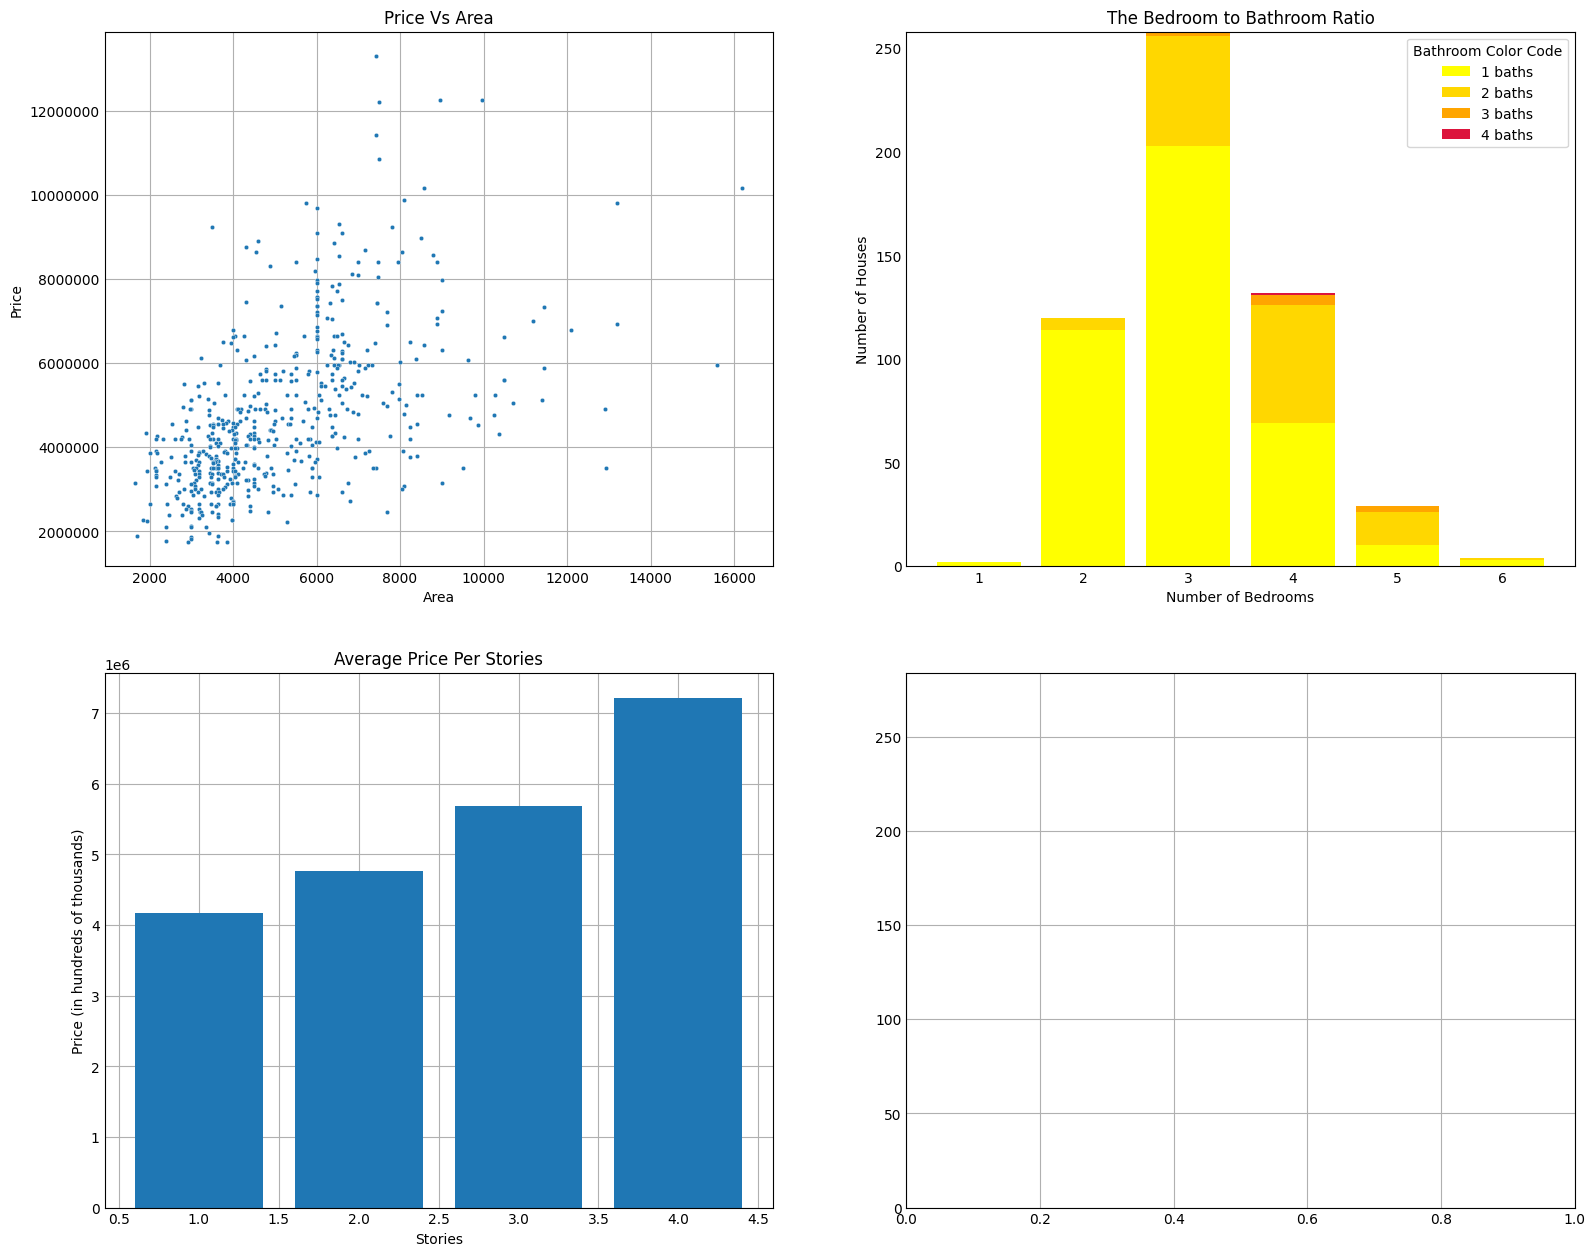

In [10]:
plt.style.use('_mpl-gallery')

# make data:

fig, ax = plt.subplots(2,2,figsize=(15, 12))
ax[0,0].ticklabel_format(style='plain', axis='y')
sns.scatterplot(x=Area_array, y=price_array,s=10,ax=ax[0,0])
ax[0,0].set_xlabel('Area')
ax[0,0].set_ylabel('Price')
ax[0,0].set_title('Price Vs Area')

# Making a stacked bar chart data matrix
unique_beds = np.unique(beds)
unique_baths = np.unique(baths)

# Stacked bar matrix (rows=baths, cols=beds)
stack_matrix = np.zeros((len(unique_baths), len(unique_beds)))

for i, b in enumerate(unique_beds):
    for x, bath in enumerate(unique_baths):
        stack_matrix[x, i] = np.sum((beds == b) & (baths == bath))

# Number of bathrooms : color in chart
bath_colors = {
    1: "yellow",
    2: "gold",
    3: "orange",
    4: "crimson"
    }
# Start all stacks at 0
bottom = np.zeros(len(unique_beds))

# Plotted in the [1,1] dashboard position
for x, bath in enumerate(unique_baths):
    color = bath_colors.get(bath, "grey")  # fallback for unexpected values
    ax[0,1].bar(
                  unique_beds, stack_matrix[x], 
                  bottom = bottom, 
                  color = color, 
                  label = (f"{bath} baths"))
    bottom += stack_matrix[x]

ax[0,1].set_title("The Bedroom to Bathroom Ratio")
ax[0,1].set_xlabel("Number of Bedrooms")
ax[0,1].set_ylabel("Number of Houses")
ax[0,1].grid(False)
ax[0,1].legend(title = "Bathroom Color Code")

# So it doesn't touch the top
max_height = np.max(np.sum(stack_matrix, axis = 0)) # Calculate maximum height of stacked bars
ax[1,1].set_ylim(0, max_height * 1.1) # Add a small 10% padding 

# Find average price depending on number of stories
avg_price_per_stories = df.groupby('stories')['price'].mean().round(2)

# Clean up extra info from print()
avg_price_per_stories.index.name = None
avg_price_per_stories.name = None

print("Average Price Per Stories:")
print(avg_price_per_stories.to_string())

ax[1,0].bar(avg_price_per_stories.index, avg_price_per_stories.values)
ax[1,0].set_title("Average Price Per Stories")
ax[1,0].set_xlabel("Stories")
ax[1,0].set_ylabel("Price (in hundreds of thousands)")

plt.show()

Text(0.5, 1.0, 'Price Vs Area')

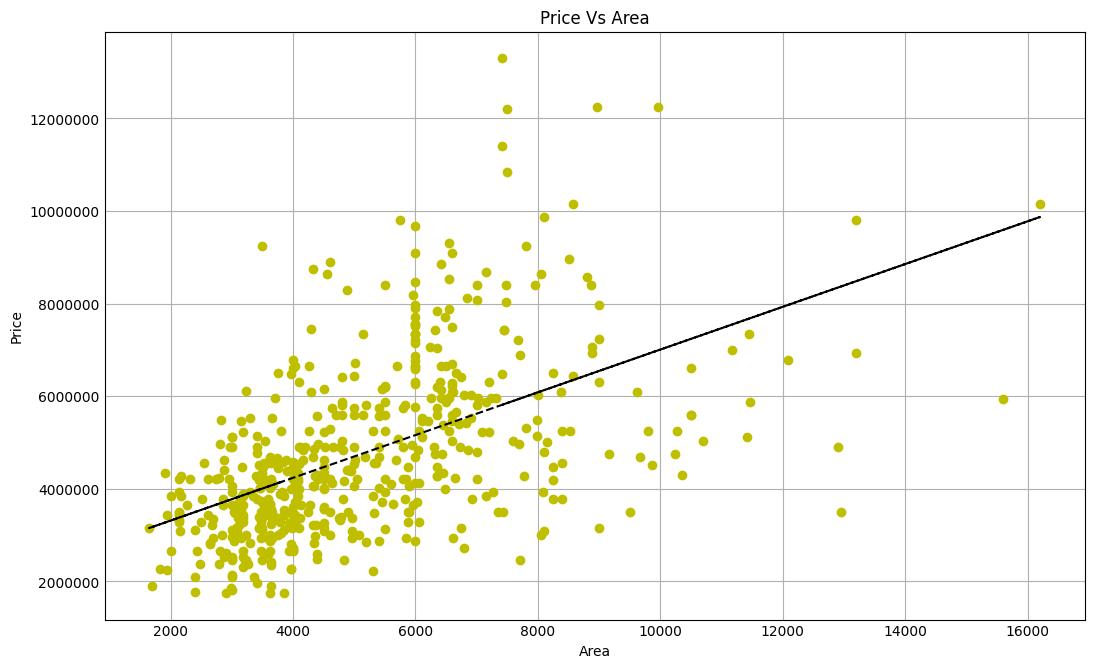

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
coef =np.polyfit(Area_array,price_array,1)
poly1d_fn = np.poly1d(coef)
plt.plot(Area_array,price_array, 'yo',Area_array,poly1d_fn(Area_array), '--k')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Vs Area')